In [1]:
import matplotlib.pyplot as plt
import numpy as np
import compute_energy

# Lennard–Jones: Potential Energy Analysis (08/10/2025)

### Objective
Compute the **total potential energy** of atomic systems interacting via the **Lennard–Jones (LJ)** potential, and analyze the behavior of the **energy per atom** as a function of the total number of atoms \(N\).

### Input Data
- Input file: `fcc100a108.txt` (and later, all files matching `fcc100a*.txt`)
- Format: Cartesian coordinates \((x, y, z)\) in Å (one line per atom)



### Physical Model
Lennard–Jones potential:

$\Phi(r_{ij}) = 4\epsilon\!\left[\left(\frac{\sigma}{r_{ij}}\right)^{12} - \left(\frac{\sigma}{r_{ij}}\right)^{6}\right]$

Total potential energy:

$E_{\mathrm{pot}} = \tfrac{1}{2}\sum_{i\neq j}\Phi(r_{ij})$
> *Note*: if the summation is performed only for pairs \(i < j\), the factor \(\tfrac{1}{2}\) is **implicitly included** and should not be applied again.

##### Parameters
- $\epsilon = 0.345\ \mathrm{eV}$
- $\sigma = 2.644\ \text{\AA}$

### Tasks
1. **Read atomic positions** from `fcc100a108.txt`.
2. **Compute** the total potential energy $E_{\mathrm{pot}}$ (in eV) using the formulas above.
3. **Repeat** the calculation for **all available cells** (`fcc100a*.txt`):
   - Save results into a file with columns:  
     `N_atoms`, `E_pot`, `E_over_N`
4. **Plot** $E_{\mathrm{pot}}/N$ as a function of $N$:  
   - *x-axis*: Number of atoms $N$  
   - *y-axis*: $E_{\mathrm{pot}}/N$



In [18]:
data = ["fcc100a108.txt", "fcc100a256.txt", "fcc100a500.txt", "fcc100a864.txt", "fcc100a1372.txt", "fcc100a2048.txt"]
E = []
Natoms = []
E_over_N = []

#print(" n atoms    Total Energy")
#print("-------------------------")

# compute total potential energy
for file in data :
    coord = np.loadtxt("data/"+file)
    N = coord.shape[0]
    Natoms.append(N)
    energy_value = compute_energy.energy(file)
    E.append(energy_value)
    #print(f"{N:6d}        {energy_value:.1f}")

# compute energy per atom
for e_value, n_value in zip(E, Natoms):
    E_over_N.append(e_value/n_value)

# save the results in a file.txt
results = np.column_stack((Natoms, E, E_over_N))
np.savetxt("LJ_results.txt", results, fmt=["%d", "%.3f", "%.3f"])


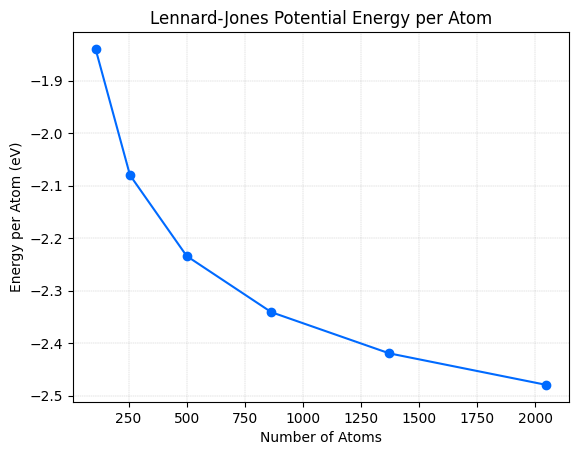

In [ ]:
# plot E/N as a function of N
plt.plot(Natoms, E_over_N, 'o-', color="#006aff", label="E/N")
plt.xlabel("Number of Atoms")
plt.ylabel("Energy per Atom (eV)")
plt.title("Lennard-Jones Potential Energy per Atom")
plt.grid(True, color='gray', linestyle='--', linewidth=0.3, alpha=0.5)
plt.show()